In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
X_df= pd.read_json('mydata-mitbih-small.json')

In [68]:
X_df.shape

(5000, 2001)

In [69]:
X_data = np.array(X_df.sample(frac=1))
Y_data = X_data[:,-1]
X_data = X_data[:,:-1]

Y_data = 1.*(Y_data > 0.)

In [70]:
N = 1000

In [71]:
Y = Y_data[:N]
X = X_data[:N]


In [72]:
import pymultifracs.psd as psd

fs = 1

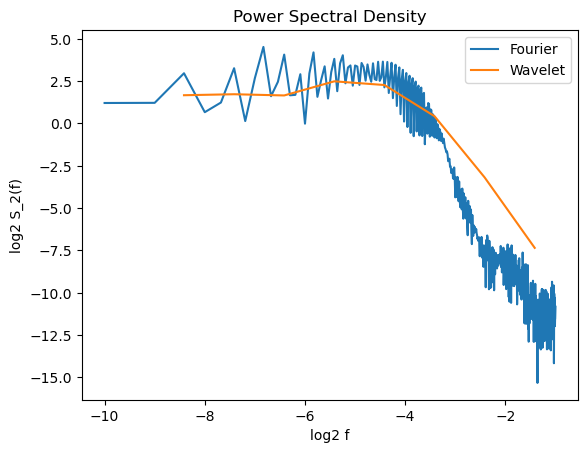

In [73]:
rand_int = np.random.randint(N)
psd.plot_psd(X[rand_int], fs, n_fft=1024)

In [74]:
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log

In [75]:
dwt, lwt = mfa.mf_analysis_full(X[rand_int],
    scaling_ranges = [[1,7]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.0
)

In [76]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

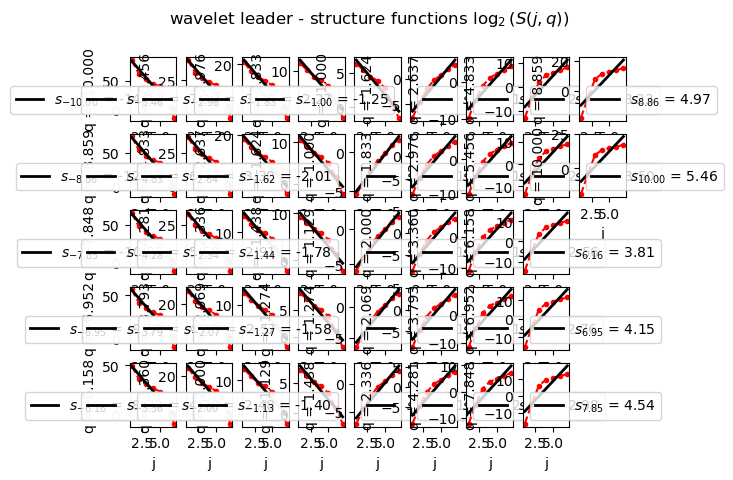

In [77]:
lwt_sf.plot(nrow=5)

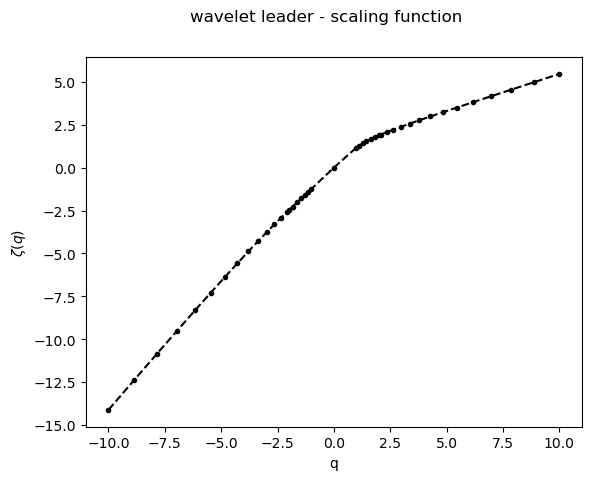

In [78]:
lwt_sf.plot_scaling()

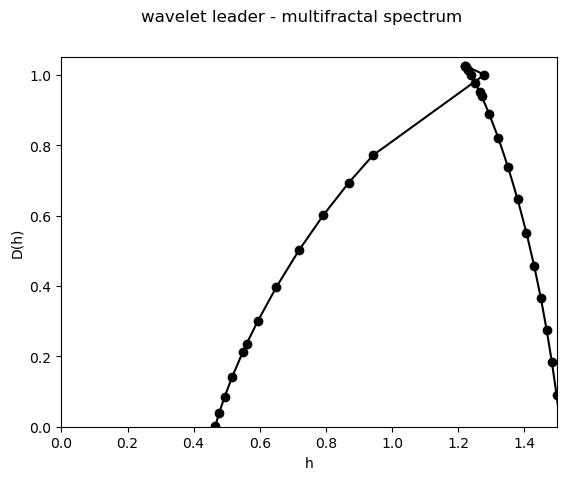

In [79]:
lwt_mfs.plot()

In [82]:
with open('hrv_test.txt', 'r') as file:
    # Read the lines and convert them to floats
    # print([line for line in file])
    #values = [float(line.strip()) if line.strip() != '' else np.nan for line in file ]
    values = [float(line.strip()) for line in file if line.strip() != '']
    hrv = np.array(values)

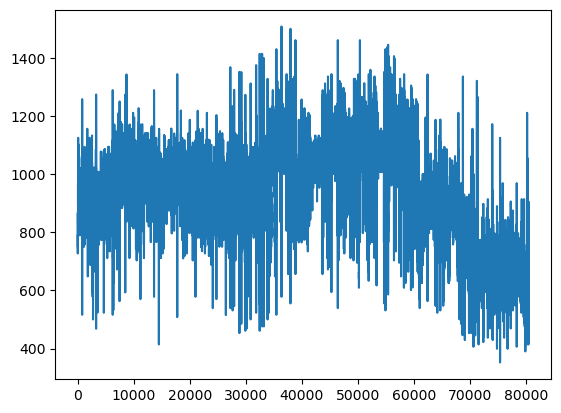

In [83]:
plt.plot(hrv)

In [85]:
dwt, lwt = mfa.mf_analysis_full(hrv,
    scaling_ranges = [[1,13]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.0
)

In [86]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

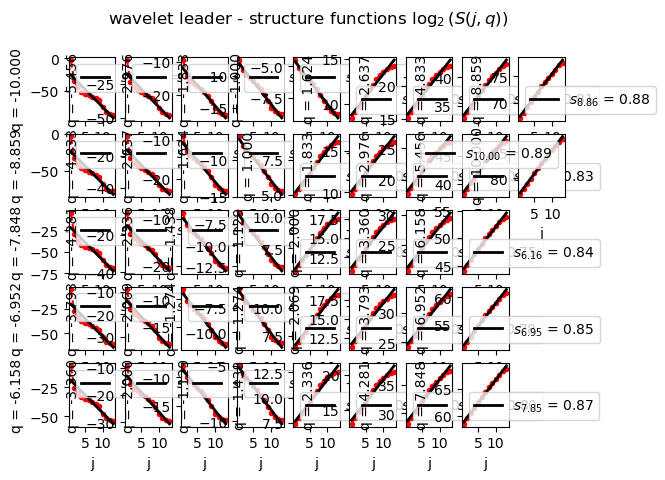

In [87]:
lwt_sf.plot(nrow=5)

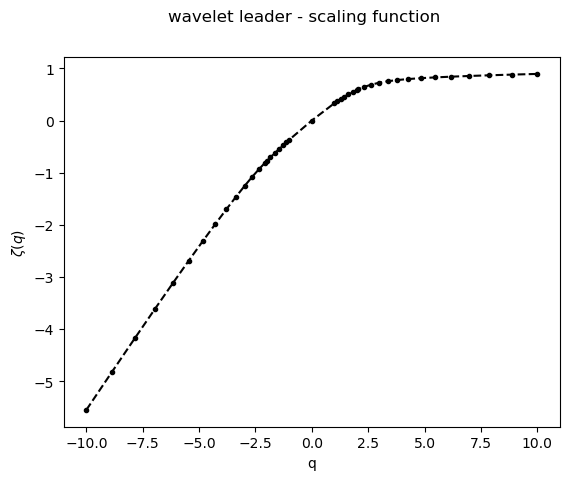

In [88]:
lwt_sf.plot_scaling()

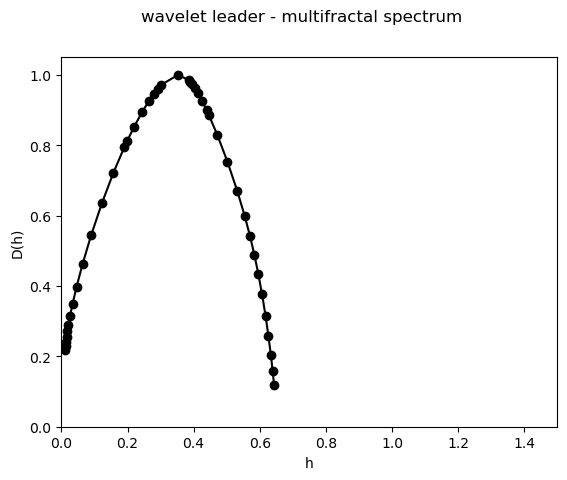

In [89]:
lwt_mfs.plot()

In [96]:
dwt, lwt = mfa.mf_analysis_full(hrv,
    scaling_ranges = [[10,13]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.0
)

In [97]:
lwt_sf, lwt_cumul, lwt_mfs, hmin = lwt

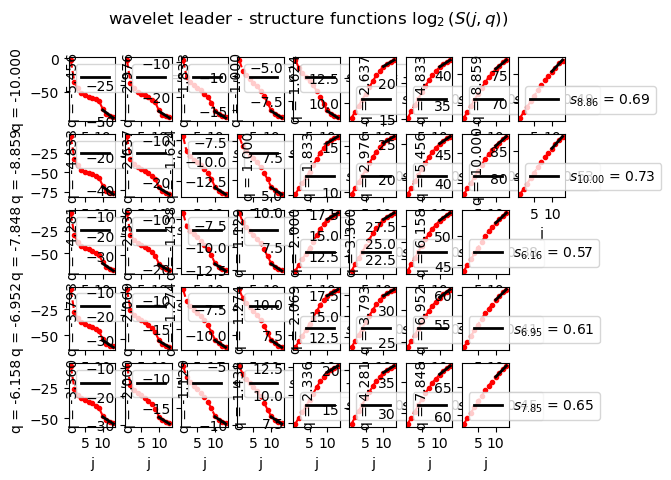

In [98]:
lwt_sf.plot(nrow=5)

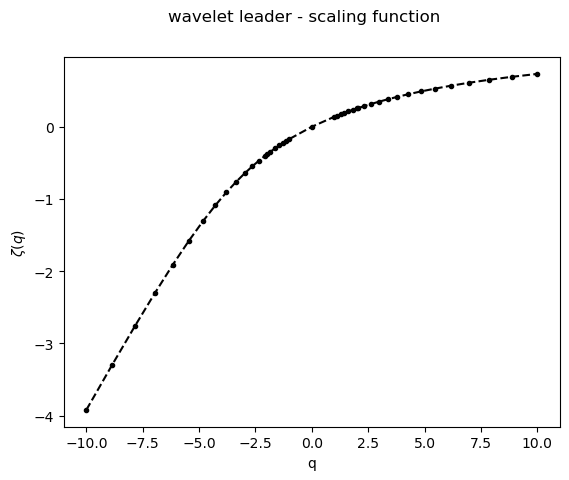

In [99]:
lwt_sf.plot_scaling()

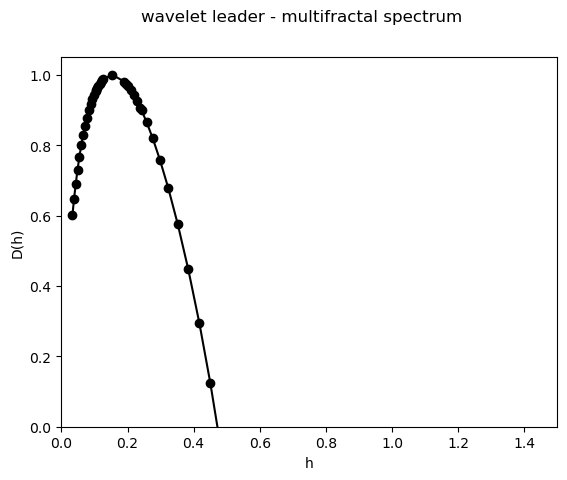

In [100]:
lwt_mfs.plot()

In [111]:
lwt_mfs.hq

array([[[0.54881068]],

       [[0.5391725 ]],

       [[0.52505131]],

       [[0.50550664]],

       [[0.48028217]],

       [[0.45022301]],

       [[0.41723772]],

       [[0.38372192]],

       [[0.35181001]],

       [[0.32290619]],

       [[0.29762958]],

       [[0.2760148 ]],

       [[0.25776459]],

       [[0.24244501]],

       [[0.23861255]],

       [[0.22960249]],

       [[0.2188208 ]],

       [[0.20974161]],

       [[0.20206667]],

       [[0.19555187]],

       [[0.18999897]],

       [[0.15324685]],

       [[0.12561938]],

       [[0.12257758]],

       [[0.11926561]],

       [[0.11567434]],

       [[0.1117979 ]],

       [[0.10763448]],

       [[0.10446261]],

       [[0.10318723]],

       [[0.09846521]],

       [[0.09348429]],

       [[0.08826806]],

       [[0.08284843]],

       [[0.07726599]],

       [[0.07156964]],

       [[0.06581542]],

       [[0.06006411]],

       [[0.05437774]],

       [[0.0488153 ]],

       [[0.04342858]],

       [[0.03825

In [109]:
lwt_mfs.Dq

array([[[-0.56579134]],

       [[-0.475393  ]],

       [[-0.35800439]],

       [[-0.21398241]],

       [[-0.04919519]],

       [[ 0.12490945]],

       [[ 0.29429626]],

       [[ 0.44687487]],

       [[ 0.57564617]],

       [[ 0.67901156]],

       [[ 0.75911125]],

       [[ 0.81979958]],

       [[ 0.86519678]],

       [[ 0.89895585]],

       [[ 0.9067536 ]],

       [[ 0.9240262 ]],

       [[ 0.94267089]],

       [[ 0.956579  ]],

       [[ 0.9669937 ]],

       [[ 0.97482479]],

       [[ 0.98073759]],

       [[ 1.        ]],

       [[ 0.98682465]],

       [[ 0.98358802]],

       [[ 0.97961002]],

       [[ 0.97474104]],

       [[ 0.9688086 ]],

       [[ 0.96161644]],

       [[ 0.95553939]],

       [[ 0.95294468]],

       [[ 0.9425515 ]],

       [[ 0.93017692]],

       [[ 0.91554919]],

       [[ 0.89839444]],

       [[ 0.87844955]],

       [[ 0.85547791]],

       [[ 0.82928594]],

       [[ 0.79973762]],

       [[ 0.76676258]],

       [[ 0.73035426]],



In [102]:
from scipy import signal

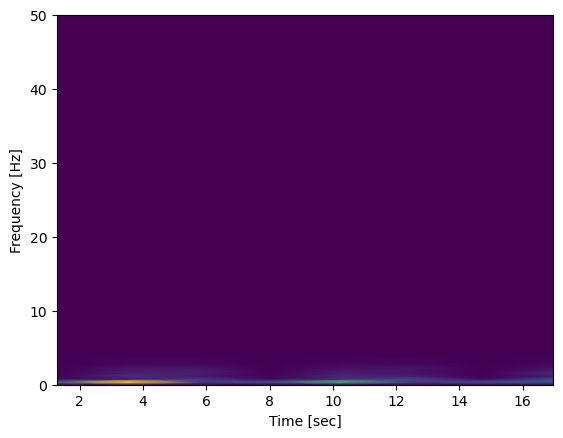

In [107]:
f, t, Sxx = signal.spectrogram(X[0], 100)

plt.pcolormesh(t, f, Sxx, shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()